<a href="https://colab.research.google.com/github/nissrinesouri/Python_class/blob/main/Project_python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supermarket Sales Analysis Project**
## **Author**: *Nissrine Souri*

## **Dataset**: *Supermarket Sales Data*
**Description**: This project analyzes supermarket sales data to uncover trends in revenue, customer behavior, and profitability.

#Importing Libraries


In [281]:
import numpy as np
import pandas as pd

In [282]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="ipykernel")

# Loading the Dataset

In [283]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [284]:
import os
drive_path = "/content/drive/My Drive/"

In [285]:
file_path = "/content/drive/My Drive/SuperMarket Analysis.csv"
df = pd.read_csv(file_path)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


# Data Manipulation and Operations



### **Check dataset information**

In [286]:
df.shape

(1000, 17)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  


* The dataset contains 1,000 rows and 17 columns.
* Most columns are of type object (string)
* Numeric columns (Unit Price, Quantity, Tax 5%, Sales, cogs, gross_income, Rating) are floats or integers, which is convenient.
* Date column's data type is object but should be converted to datetime for better data preparation and analysis.
* Time is also an object, we will deal with both of them after normalizing the nomenclature

* The dataset is a 1000 rows long, and contains 17 columns

### **Check for null values**

In [288]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


* The output shows 0 missing values across all columns, so there is no need for handling missing data.

### **Check for duplicated rows**

In [289]:
print("\nDuplicate Rows:")
df.duplicated().sum()



Duplicate Rows:


0

* The output for duplicated data also shows 0 duplicated rows.

## **Display all column names in the dataset**

In [290]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

* We notice some names have spaces
* We also notice some names' first letters are set to uppercase, whereas others are set to lowercase
* It is preferrable to standardize the names: make all lowercase, and remove the spaces


We import Janitor to clean the names

In [291]:
try:
  import janitor
except:
  print("Module is not preinstalled! Installing now..")
  !pip install pyjanitor
  import janitor

In [292]:
from janitor import clean_names

df = clean_names(df)
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'sales', 'date',
       'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'rating'],
      dtype='object')

* Now, we can see that all column names are lowercase, spaces are replaced with underscores, and special characters are standardized.

## Data types update for Date and Time

* Now we can update the data type of date column into datetime

In [293]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5%                   1000 non-null   float64       
 9   sales                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     1000 non-null   object        
 12  payment                  1000 non-n

## View the first rows of the dataset

In [294]:
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,sales,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


* We notice that the time atribute is in a 12-hour clock format (PM/AM), which is not appropriate if we wan to analyse further on time
* We transform the dates to a 12-hour clock format

In [295]:
df['time'] = pd.to_datetime(df['time'], format='%I:%M:%S %p').dt.time

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5%                   1000 non-null   float64       
 9   sales                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     1000 non-null   object        
 12  payment                  1000 non-n

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,sales,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


## Summary statistics of numerical columns


In [296]:
df.describe()

,unit_price,quantity,tax_5%,sales,date,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


## Addition of a Producti Line description column to our dataframe

In [297]:
product_descriptions = {
    "Food and beverages": "Items related to food, snacks, and drinks.",
    "Health and beauty": "Personal care and wellness products.",
    "Fashion accessories": "Wearable accessories like watches, belts, etc.",
    "Electronic accessories": "Gadgets and device accessories.",
    "Home and lifestyle": "Furniture, decorations, and home essentials.",
    "Sports and travel": "Outdoor and sports-related products."
}


df['product_description'] = df['product_line'].map(product_descriptions)

df[['product_line', 'product_description']].head()


,product_line,product_description
0,Health and beauty,Personal care and wellness products.
1,Electronic accessories,Gadgets and device accessories.
2,Home and lifestyle,"Furniture, decorations, and home essentials."
3,Health and beauty,Personal care and wellness products.
4,Sports and travel,Outdoor and sports-related products.


# Sales and Revenue Insights


## Identifying Peak Sales Hours

- At what time of day do most sales occur? Can we identify peak hours when the store is busiest?
We will filter the dataset to analyze sales based on time and categorize transactions into 3 day parts: Morning (6 AM - 12 PM), afternoon (12 PM - 6 PM and evening (6 PM - Midnight)
Then, we will count transactions in each period.

In [298]:
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

df['time_of_day'] = df['hour'].apply(categorize_time)


df[['time', 'hour', 'time_of_day']].head()



,time,hour,time_of_day
0,13:08:00,13,Afternoon
1,10:29:00,10,Morning
2,13:23:00,13,Afternoon
3,20:33:00,20,Evening
4,10:37:00,10,Morning


In [299]:
sales_by_time = df.groupby('time_of_day')['sales'].count().reset_index()
sales_by_time = sales_by_time.sort_values(by='sales', ascending=False)
sales_by_time


,time_of_day,sales
0,Afternoon,528
1,Evening,281
2,Morning,191


* We notice that the afternoon (from 12 PM to 5 PM) has the highest number of sales (528 transactions), followed by the evening and then the morning.



## Sales trends by weekday

In [300]:
df['day_of_week'] = df['date'].dt.day_name()
sales_by_day = df.groupby('day_of_week')['sales'].sum().sort_values(ascending=False)
print(sales_by_day)


day_of_week
Saturday     56120.8095
Tuesday      51482.2455
Thursday     45349.2480
Sunday       44457.8925
Friday       43926.3405
Wednesday    43731.1350
Monday       37899.0780
Name: sales, dtype: float64


## Define product lines that generate the highest total sale

We can calculate the total sales for each product line using a function we create

In [301]:
def total_sales_all_products(df):
    product_sales = {}
    for product in df['product_line'].unique():
        sales = df[df['product_line'] == product]['sales'].sum()
        product_sales[product] = round(sales, 2)  # Store in dictionary
    return product_sales

product_sales_dict = total_sales_all_products(df)
sales_by_product_df = pd.DataFrame(list(product_sales_dict.items()), columns=['Product Line', 'Total Sales'])
sales_by_product_df = sales_by_product_df.sort_values(by='Total Sales', ascending=False)

print(sales_by_product_df)

             Product Line  Total Sales
4      Food and beverages     56144.84
3       Sports and travel     55122.83
1  Electronic accessories     54337.53
5     Fashion accessories     54305.90
2      Home and lifestyle     53861.91
0       Health and beauty     49193.74


We can achieve the same results by grouping the sales by product line and sorting the results

In [302]:
sales_by_product = df.groupby('product_line')['sales'].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by='sales', ascending=False)
sales_by_product

,product_line,sales
2,Food and beverages,56144.8440
5,Sports and travel,55122.8265
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
4,Home and lifestyle,53861.9130
3,Health and beauty,49193.7390


We notice that:
* *Food and Beverages* is the highest-selling category with $56,144 in total sales.

* *Sports and Travel* follows closely with $55,122.

* *Electronic Accessories*, *Fashion Accessories*, and *Home & Lifestyle* are all high-performing categories, each generating over $53,000.


* *Health and Beauty* has the lowest total sales at $49,193, though it's still relatively high.

## Find most profitable product lines

Now we know which lines make high sales, but we need to find which are the ones that generate gross income

In [303]:
# we gloup by product line and caculate total gross income
profit_by_product = df.groupby('product_line')['gross_income'].sum().reset_index()

# we sort
profit_by_product = profit_by_product.sort_values(by='gross_income', ascending=False)
profit_by_product


,product_line,gross_income
2,Food and beverages,2673.5640
5,Sports and travel,2624.8965
0,Electronic accessories,2587.5015
1,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
3,Health and beauty,2342.5590


We notice that:
* Our business driver is the Food and beverages line.
* other lines follow in the same order as sales.

## Find the profit margin for each product line

The formula of the profit margin is dividing the income by the revenue, in terms of this case, we will divide the gross income by the sales. We display it as a percentage.

In [304]:
profitability = df.groupby('product_line').agg({'sales': 'sum', 'gross_income': 'sum'}).reset_index()
profitability['profit_margin_%'] = (profitability['gross_income'] / profitability['sales']) * 100

profitability = profitability.sort_values(by='profit_margin_%', ascending=False)

profitability

,product_line,sales,gross_income,profit_margin_%
3,Health and beauty,49193.7390,2342.5590,4.761905
0,Electronic accessories,54337.5315,2587.5015,4.761905
1,Fashion accessories,54305.8950,2585.9950,4.761905
2,Food and beverages,56144.8440,2673.5640,4.761905
4,Home and lifestyle,53861.9130,2564.8530,4.761905
5,Sports and travel,55122.8265,2624.8965,4.761905


All product lines have the same profit margin of 4.76%. We can deduce that the sales volume is the main driver of profitability.

## Find the branches branches that generate the most sales and profits

# Customer and Branch Analysis


In [305]:
branch_performance = df.groupby('branch').agg({'sales': 'sum', 'gross_income': 'sum'}).reset_index()
branch_performance = branch_performance.sort_values(by='sales', ascending=False)

branch_performance


,branch,sales,gross_income
2,Giza,110568.7065,5265.1765
0,Alex,106200.3705,5057.1605
1,Cairo,106197.6720,5057.0320


We notice that:
* Giza is the top-performing branch as it generates the most revenue and contributes the highest total profit to the business.
* Alex and Cairo are very close in performance,

## Find whether Normal or Member customers contribute more to sales and profit



In [306]:
customer_performance = df.groupby('customer_type').agg({'sales': 'sum', 'gross_income': 'sum'}).reset_index()

customer_performance = customer_performance.sort_values(by='sales', ascending=False)

customer_performance

,customer_type,sales,gross_income
0,Member,189694.764,9033.084
1,Normal,133271.985,6346.285


We notice that members contribute significantly more sales & profit than Normal customers. Let's find the percentage difference in sales contribution between Members and Normal customers:

In [307]:
member_sales = customer_performance[customer_performance['customer_type'] == 'Member']['sales'].values[0]
normal_sales = customer_performance[customer_performance['customer_type'] == 'Normal']['sales'].values[0]

percentage_difference = ((member_sales - normal_sales) / normal_sales) * 100
print(f"Members generate {percentage_difference:.2f}% more sales than Normal customers.")

Members generate 42.34% more sales than Normal customers.


Members generate 42.34% more sales than Normal customers.

## Most popular payment method

In [308]:
# Group
payment_method = df['payment'].value_counts().reset_index()
payment_method.columns = ['payment_method', 'transaction_count']

total_transactions = payment_method['transaction_count'].sum()

payment_method['percentage'] = ((payment_method['transaction_count'] / total_transactions) * 100).round(2)

payment_method

,payment_method,transaction_count,percentage
0,Ewallet,345,34.5
1,Cash,344,34.4
2,Credit card,311,31.1


We notice that all the payment methods are used almost equally, with a slight advantage for ewallets (34.5%), while credit falls slightly behind (31.1%)

## Gender contributions

In [309]:
# Group by gender
gender_performance = df.groupby('gender').agg({'sales': 'sum', 'gross_income': 'sum'}).reset_index()

total_sales = gender_performance['sales'].sum()
total_profit = gender_performance['gross_income'].sum()
gender_performance['sales_percentage'] = ((gender_performance['sales'] / total_sales) * 100).round(2)
gender_performance['profit_percentage'] = ((gender_performance['gross_income'] / total_profit) * 100).round(2)

gender_performance

,gender,sales,gross_income,sales_percentage,profit_percentage
0,Female,194671.8375,9270.0875,60.28,60.28
1,Male,128294.9115,6109.2815,39.72,39.72


* Female customers spend more money and contribute more to profits.
* 60% of total revenue comes from female shoppers, while males contribute only 40%

# More simple data insights

### Average sales per transaction

In [310]:
average_sales = df['sales'].mean()
print(f"Average Sales per Transaction: ${average_sales:.2f}")

Average Sales per Transaction: $322.97


The average amount spent per transaction in this supermarket dataset is $322.97.

  i.e., each customer spends around $323 per purchase.


### Categorize transactions based on spending levels

We extract the min and max sales values in order to divide our sales range into 3 equal spending subcategories,
we create a function to assign ot each transaction to its corresponding category (low, mid or high)

In [313]:
min_sale = df['sales'].min()
max_sale = df['sales'].max()

interval = (max_sale - min_sale) / 3

def dynamic_spending_category(amount):
    if amount <= min_sale + interval:
        return f"Low Spend (${min_sale:.2f} - ${min_sale + interval:.2f})"
    elif amount <= min_sale + 2 * interval:
        return f"Mid Spend (${min_sale + interval:.2f} - ${min_sale + 2 * interval:.2f})"
    else:
        return f"High Spend (${min_sale + 2 * interval:.2f} - ${max_sale:.2f})"

spending_summary = df.groupby(df['sales'].apply(dynamic_spending_category)).size().reset_index(name='Transaction Count')
spending_summary.columns = ['Spending Category', 'Transaction Count']

spending_summary

,Spending Category,Transaction Count
0,High Spend ($698.66 - $1042.65),109
1,Low Spend ($10.68 - $354.67),636
2,Mid Spend ($354.67 - $698.66),255


* Most transactions (636) are in the Low Spend category, meaning that a large portion of customers spend less than $354 per transaction.
* 255 transactions fall into the Mid Spend range, indicating a moderate spending group.
* Only 109 transactions are in the High Spend category, meaning that big spenders are relatively rare.

# Visualizations

We plot some of these findings, starting by importing matplotlib.pyplot

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns

## Bar Chart: Total Sales & Gross Income by Gender


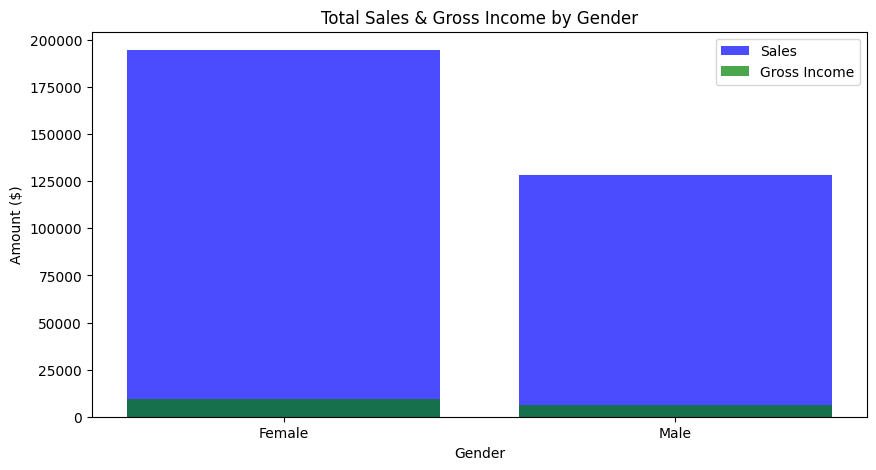

In [315]:
plt.figure(figsize=(10, 5))
plt.bar(gender_performance['gender'], gender_performance['sales'], label="Sales", color='blue', alpha=0.7)
plt.bar(gender_performance['gender'], gender_performance['gross_income'], label="Gross Income", color='green', alpha=0.7)
plt.xlabel("Gender")
plt.ylabel("Amount ($)")
plt.title("Total Sales & Gross Income by Gender")
plt.legend()
plt.show()


## Pie Chart: Sales Distribution by Gender

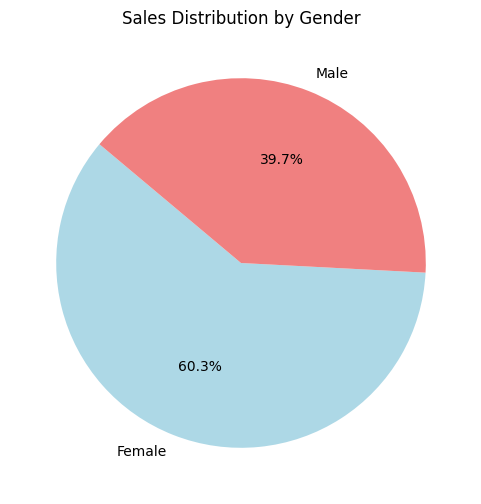

In [316]:
plt.figure(figsize=(6, 6))
plt.pie(gender_performance['sales_percentage'], labels=gender_performance['gender'], autopct='%1.1f%%',
        colors=['lightblue', 'lightcoral'], startangle=140)
plt.title("Sales Distribution by Gender")
plt.show()

## Bar Chart: Sales by Product Line

<ipython-input-317-337b5e200d92>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_line', y='sales', data=df, palette="Set2")


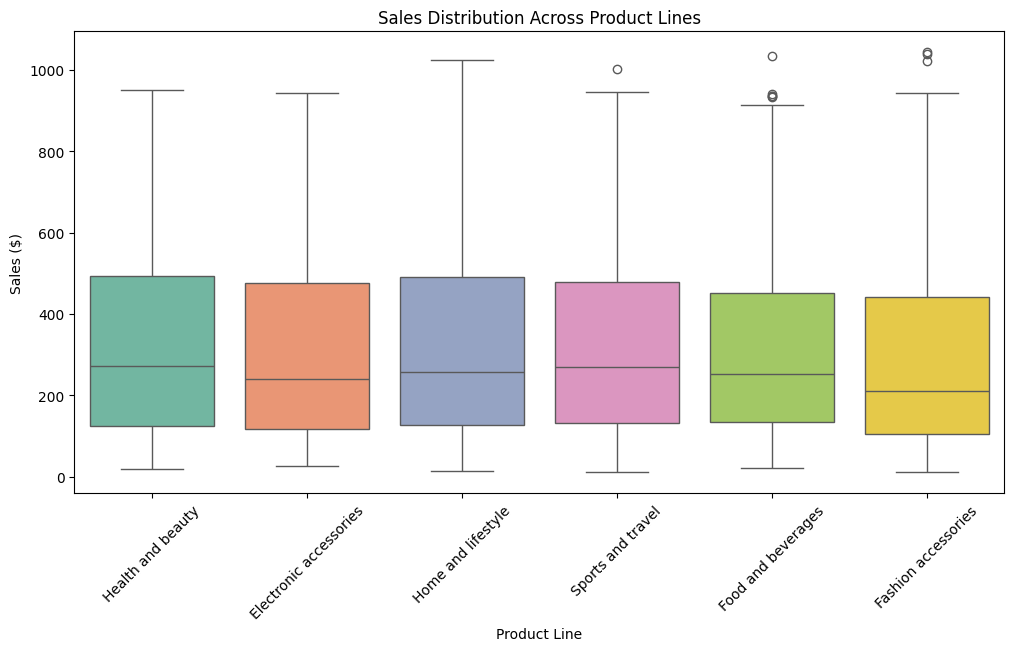

In [317]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_line', y='sales', data=df, palette="Set2")
plt.xlabel("Product Line")
plt.ylabel("Sales ($)")
plt.title("Sales Distribution Across Product Lines")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

## Heatmap: Correlation Between Numerical Variables

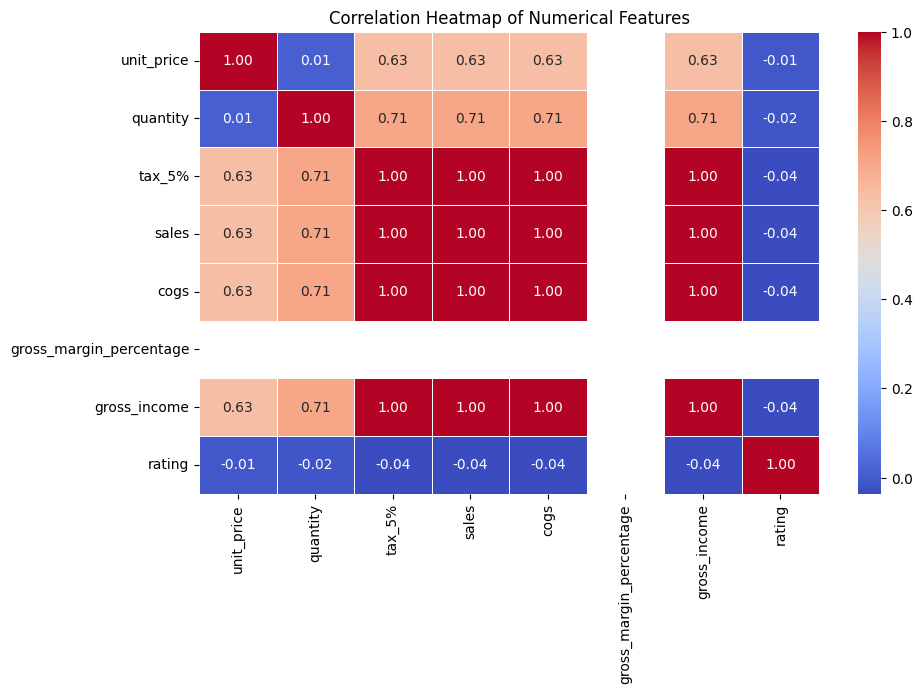

In [318]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

* Sales vs. Gross Income (1.00) → Perfect Correlation --> as sales increase, gross income increases proportionally.

* the more items a customer purchases, the higher the total sales.
* Tax and cost of goods sold (COGS) increase in proportion to sales.
* as sales rise, the total tax paid and the cost of goods sold also rise.

* The number of units purchased does not strongly depend on price.
* Gross margin percentage does not increase or decrease with sales volume.

* higher sales do not necessarily mean better customer ratings.
* high unit price products tend to receive slightly lower ratings.




# SQL Integration

In [319]:
!pip install sqlalchemy --quiet

import os
from sqlalchemy import create_engine, Table, Column, Integer, String, Float, DateTime, MetaData, text

- connecting to the DB

In [320]:
db_path = os.path.join(os.getcwd(), "supermarket_sales.db")
db_url = f"sqlite:///{db_path}"

engine = create_engine(db_url, echo=True)

* Define the Sales Data Table

In [321]:
metadata = MetaData()

sales_data = Table(
    "sales_data", metadata,
    Column("invoice_id", String, primary_key=True),
    Column("branch", String),
    Column("city", String),
    Column("customer_type", String),
    Column("gender", String),
    Column("product_line", String),
    Column("unit_price", Float),
    Column("quantity", Integer),
    Column("tax_5%", Float),
    Column("sales", Float),
    Column("date", DateTime),
    Column("time", String),
    Column("payment", String),
    Column("cogs", Float),
    Column("gross_margin_percentage", Float),
    Column("gross_income", Float),
    Column("rating", Float)
)

metadata.create_all(engine)

2025-01-31 21:00:33,279 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2025-01-31 21:00:33,290 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("sales_data")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("sales_data")


2025-01-31 21:00:33,297 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2025-01-31 21:00:33,305 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


* Insert Data into the Table

In [322]:
df.to_sql("sales_data", engine, if_exists="replace", index=False)

2025-01-31 21:00:36,329 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2025-01-31 21:00:36,355 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("sales_data")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("sales_data")


2025-01-31 21:00:36,361 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2025-01-31 21:00:36,367 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("sales_data")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("sales_data")


2025-01-31 21:00:36,376 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2025-01-31 21:00:36,379 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2025-01-31 21:00:36,384 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2025-01-31 21:00:36,391 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='view' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='view' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2025-01-31 21:00:36,399 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2025-01-31 21:00:36,406 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("sales_data")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_xinfo("sales_data")


2025-01-31 21:00:36,412 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2025-01-31 21:00:36,415 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2025-01-31 21:00:36,423 INFO sqlalchemy.engine.Engine [raw sql] ('sales_data',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('sales_data',)


2025-01-31 21:00:36,461 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("sales_data")


INFO:sqlalchemy.engine.Engine:PRAGMA main.foreign_key_list("sales_data")


2025-01-31 21:00:36,477 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2025-01-31 21:00:36,490 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("sales_data")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.foreign_key_list("sales_data")


2025-01-31 21:00:36,497 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2025-01-31 21:00:36,515 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2025-01-31 21:00:36,529 INFO sqlalchemy.engine.Engine [raw sql] ('sales_data',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('sales_data',)


2025-01-31 21:00:36,536 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("sales_data")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("sales_data")


2025-01-31 21:00:36,550 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2025-01-31 21:00:36,557 INFO sqlalchemy.engine.Engine PRAGMA temp.index_list("sales_data")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.index_list("sales_data")


2025-01-31 21:00:36,565 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2025-01-31 21:00:36,610 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("sales_data")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("sales_data")


2025-01-31 21:00:36,618 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2025-01-31 21:00:36,637 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("sales_data")


INFO:sqlalchemy.engine.Engine:PRAGMA main.index_list("sales_data")


2025-01-31 21:00:36,640 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2025-01-31 21:00:36,643 INFO sqlalchemy.engine.Engine PRAGMA temp.index_list("sales_data")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.index_list("sales_data")


2025-01-31 21:00:36,645 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2025-01-31 21:00:36,648 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("sales_data")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("sales_data")


2025-01-31 21:00:36,650 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2025-01-31 21:00:36,653 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


INFO:sqlalchemy.engine.Engine:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2025-01-31 21:00:36,656 INFO sqlalchemy.engine.Engine [raw sql] ('sales_data',)


INFO:sqlalchemy.engine.Engine:[raw sql] ('sales_data',)


2025-01-31 21:00:36,661 INFO sqlalchemy.engine.Engine 
DROP TABLE sales_data


INFO:sqlalchemy.engine.Engine:
DROP TABLE sales_data


2025-01-31 21:00:36,692 INFO sqlalchemy.engine.Engine [no key 0.03119s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.03119s] ()


2025-01-31 21:00:36,730 INFO sqlalchemy.engine.Engine 
CREATE TABLE sales_data (
	invoice_id TEXT, 
	branch TEXT, 
	city TEXT, 
	customer_type TEXT, 
	gender TEXT, 
	product_line TEXT, 
	unit_price FLOAT, 
	quantity BIGINT, 
	"tax_5%" FLOAT, 
	sales FLOAT, 
	date DATETIME, 
	time TIME, 
	payment TEXT, 
	cogs FLOAT, 
	gross_margin_percentage FLOAT, 
	gross_income FLOAT, 
	rating FLOAT, 
	product_description TEXT, 
	hour INTEGER, 
	time_of_day TEXT, 
	day_of_week TEXT
)




INFO:sqlalchemy.engine.Engine:
CREATE TABLE sales_data (
	invoice_id TEXT, 
	branch TEXT, 
	city TEXT, 
	customer_type TEXT, 
	gender TEXT, 
	product_line TEXT, 
	unit_price FLOAT, 
	quantity BIGINT, 
	"tax_5%" FLOAT, 
	sales FLOAT, 
	date DATETIME, 
	time TIME, 
	payment TEXT, 
	cogs FLOAT, 
	gross_margin_percentage FLOAT, 
	gross_income FLOAT, 
	rating FLOAT, 
	product_description TEXT, 
	hour INTEGER, 
	time_of_day TEXT, 
	day_of_week TEXT
)




2025-01-31 21:00:36,737 INFO sqlalchemy.engine.Engine [no key 0.00646s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00646s] ()


2025-01-31 21:00:36,846 INFO sqlalchemy.engine.Engine INSERT INTO sales_data (invoice_id, branch, city, customer_type, gender, product_line, unit_price, quantity, "tax_5%", sales, date, time, payment, cogs, gross_margin_percentage, gross_income, rating, product_description, hour, time_of_day, day_of_week) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


INFO:sqlalchemy.engine.Engine:INSERT INTO sales_data (invoice_id, branch, city, customer_type, gender, product_line, unit_price, quantity, "tax_5%", sales, date, time, payment, cogs, gross_margin_percentage, gross_income, rating, product_description, hour, time_of_day, day_of_week) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2025-01-31 21:00:36,858 INFO sqlalchemy.engine.Engine [generated in 0.09390s] [('750-67-8428', 'Alex', 'Yangon', 'Member', 'Female', 'Health and beauty', 74.69, 7, 26.1415, 548.9715, '2019-01-05 00:00:00.000000', '13:08:00.000000', 'Ewallet', 522.83, 4.761904762, 26.1415, 9.1, 'Personal care and wellness products.', 13, 'Afternoon', 'Saturday'), ('226-31-3081', 'Giza', 'Naypyitaw', 'Normal', 'Female', 'Electronic accessories', 15.28, 5, 3.82, 80.22, '2019-03-08 00:00:00.000000', '10:29:00.000000', 'Cash', 76.4, 4.761904762, 3.82, 9.6, 'Gadgets and device accessories.', 10, 'Morning', 'Friday'), ('631-41-3108', 'Alex', 'Yangon', 'Normal', 'Female', 'Home and lifestyle', 46.33, 7, 16.2155, 340.5255, '2019-03-03 00:00:00.000000', '13:23:00.000000', 'Credit card', 324.31, 4.761904762, 16.2155, 7.4, 'Furniture, decorations, and home essentials.', 13, 'Afternoon', 'Sunday'), ('123-19-1176', 'Alex', 'Yangon', 'Member', 'Female', 'Health and beauty', 58.22, 8, 23.288, 489.048, '2019-01-27 00:0

INFO:sqlalchemy.engine.Engine:[generated in 0.09390s] [('750-67-8428', 'Alex', 'Yangon', 'Member', 'Female', 'Health and beauty', 74.69, 7, 26.1415, 548.9715, '2019-01-05 00:00:00.000000', '13:08:00.000000', 'Ewallet', 522.83, 4.761904762, 26.1415, 9.1, 'Personal care and wellness products.', 13, 'Afternoon', 'Saturday'), ('226-31-3081', 'Giza', 'Naypyitaw', 'Normal', 'Female', 'Electronic accessories', 15.28, 5, 3.82, 80.22, '2019-03-08 00:00:00.000000', '10:29:00.000000', 'Cash', 76.4, 4.761904762, 3.82, 9.6, 'Gadgets and device accessories.', 10, 'Morning', 'Friday'), ('631-41-3108', 'Alex', 'Yangon', 'Normal', 'Female', 'Home and lifestyle', 46.33, 7, 16.2155, 340.5255, '2019-03-03 00:00:00.000000', '13:23:00.000000', 'Credit card', 324.31, 4.761904762, 16.2155, 7.4, 'Furniture, decorations, and home essentials.', 13, 'Afternoon', 'Sunday'), ('123-19-1176', 'Alex', 'Yangon', 'Member', 'Female', 'Health and beauty', 58.22, 8, 23.288, 489.048, '2019-01-27 00:00:00.000000', '20:33:00.

2025-01-31 21:00:36,886 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


1000

* Querying the Data


In [323]:
query = text("SELECT * FROM sales_data LIMIT 5;")
with engine.connect() as conn:
    result = conn.execute(query)
    df_sql = pd.DataFrame(result.fetchall(), columns=result.keys())

df_sql

2025-01-31 21:00:41,322 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2025-01-31 21:00:41,332 INFO sqlalchemy.engine.Engine SELECT * FROM sales_data LIMIT 5;


INFO:sqlalchemy.engine.Engine:SELECT * FROM sales_data LIMIT 5;


2025-01-31 21:00:41,346 INFO sqlalchemy.engine.Engine [generated in 0.02381s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.02381s] ()


2025-01-31 21:00:41,366 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,sales,...,time,payment,cogs,gross_margin_percentage,gross_income,rating,product_description,hour,time_of_day,day_of_week
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08:00.000000,Ewallet,522.83,4.761905,26.1415,9.1,Personal care and wellness products.,13,Afternoon,Saturday
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29:00.000000,Cash,76.40,4.761905,3.8200,9.6,Gadgets and device accessories.,10,Morning,Friday
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23:00.000000,Credit card,324.31,4.761905,16.2155,7.4,"Furniture, decorations, and home essentials.",13,Afternoon,Sunday
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,...,20:33:00.000000,Ewallet,465.76,4.761905,23.2880,8.4,Personal care and wellness products.,20,Evening,Sunday
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,...,10:37:00.000000,Ewallet,604.17,4.761905,30.2085,5.3,Outdoor and sports-related products.,10,Morning,Friday


## Find the top 3 most frequently bought products

In [328]:
query = """
SELECT product_line, SUM(quantity) AS total_quantity
FROM sales_data
GROUP BY product_line
ORDER BY total_quantity DESC
LIMIT 3;
"""

with engine.connect() as conn:
    result = conn.execute(text(query))
    df_sql = pd.DataFrame(result.fetchall(), columns=result.keys())

print(df_sql)

2025-01-31 21:07:37,663 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2025-01-31 21:07:37,667 INFO sqlalchemy.engine.Engine 
SELECT product_line, SUM(quantity) AS total_quantity
FROM sales_data
GROUP BY product_line
ORDER BY total_quantity DESC
LIMIT 3;



INFO:sqlalchemy.engine.Engine:
SELECT product_line, SUM(quantity) AS total_quantity
FROM sales_data
GROUP BY product_line
ORDER BY total_quantity DESC
LIMIT 3;



2025-01-31 21:07:37,670 INFO sqlalchemy.engine.Engine [generated in 0.00713s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00713s] ()


2025-01-31 21:07:37,674 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


             product_line  total_quantity
0  Electronic accessories             971
1      Food and beverages             952
2       Sports and travel             920


* Electronic Accessories is the most sold category with 971 units, meaning it has the highest transaction volume in terms of quantity.



In [334]:
query = text("""
    SELECT product_line, SUM(`tax_5%`) AS total_discount
    FROM sales_data
    GROUP BY product_line
    ORDER BY total_discount DESC
    LIMIT 3;
""")

with engine.connect() as conn:
    result = conn.execute(query)
    df_sql = pd.DataFrame(result.fetchall(), columns=result.keys())

print(df_sql)

2025-01-31 21:18:52,232 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2025-01-31 21:18:52,261 INFO sqlalchemy.engine.Engine 
    SELECT product_line, SUM(`tax_5%`) AS total_discount
    FROM sales_data
    GROUP BY product_line
    ORDER BY total_discount DESC
    LIMIT 3;



INFO:sqlalchemy.engine.Engine:
    SELECT product_line, SUM(`tax_5%`) AS total_discount
    FROM sales_data
    GROUP BY product_line
    ORDER BY total_discount DESC
    LIMIT 3;



2025-01-31 21:18:52,273 INFO sqlalchemy.engine.Engine [generated in 0.04085s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.04085s] ()


2025-01-31 21:18:52,281 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


             product_line  total_discount
0      Food and beverages       2673.5640
1       Sports and travel       2624.8965
2  Electronic accessories       2587.5015


* Food and beverages has a total discount of 2673.56 followed by sports and traveel then electronic accessories

## Find the Branch with the Highest Average Rating

In [335]:
query = text("""
    SELECT branch, AVG(rating) AS avg_rating
    FROM sales_data
    GROUP BY branch
    ORDER BY avg_rating DESC;
""")

with engine.connect() as conn:
    result = conn.execute(query)
    df_sql = pd.DataFrame(result.fetchall(), columns=result.keys())

print(df_sql)


2025-01-31 21:19:58,959 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2025-01-31 21:19:58,967 INFO sqlalchemy.engine.Engine 
    SELECT branch, AVG(rating) AS avg_rating
    FROM sales_data
    GROUP BY branch
    ORDER BY avg_rating DESC;



INFO:sqlalchemy.engine.Engine:
    SELECT branch, AVG(rating) AS avg_rating
    FROM sales_data
    GROUP BY branch
    ORDER BY avg_rating DESC;



2025-01-31 21:19:58,970 INFO sqlalchemy.engine.Engine [generated in 0.01071s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.01071s] ()


2025-01-31 21:19:58,976 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


  branch  avg_rating
0   Giza    7.072866
1   Alex    7.027059
2  Cairo    6.818072


* Giza is the branch with highest average rating

## Top-Selling Product by Branch

In [336]:
query = text("""
    SELECT branch, product_line, SUM(sales) AS total_sales
    FROM sales_data
    GROUP BY branch, product_line
    ORDER BY branch, total_sales DESC;
""")

with engine.connect() as conn:
    result = conn.execute(query)
    df_sql = pd.DataFrame(result.fetchall(), columns=result.keys())

print(df_sql)

2025-01-31 21:22:05,854 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2025-01-31 21:22:05,860 INFO sqlalchemy.engine.Engine 
    SELECT branch, product_line, SUM(sales) AS total_sales
    FROM sales_data
    GROUP BY branch, product_line
    ORDER BY branch, total_sales DESC;



INFO:sqlalchemy.engine.Engine:
    SELECT branch, product_line, SUM(sales) AS total_sales
    FROM sales_data
    GROUP BY branch, product_line
    ORDER BY branch, total_sales DESC;



2025-01-31 21:22:05,863 INFO sqlalchemy.engine.Engine [generated in 0.00936s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.00936s] ()


2025-01-31 21:22:05,870 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


   branch            product_line  total_sales
0    Alex      Home and lifestyle   22417.1955
1    Alex       Sports and travel   19372.6995
2    Alex  Electronic accessories   18317.1135
3    Alex      Food and beverages   17163.1005
4    Alex     Fashion accessories   16332.5085
5    Alex       Health and beauty   12597.7530
6   Cairo       Sports and travel   19988.1990
7   Cairo       Health and beauty   19980.6600
8   Cairo      Home and lifestyle   17549.1645
9   Cairo  Electronic accessories   17051.4435
10  Cairo     Fashion accessories   16413.3165
11  Cairo      Food and beverages   15214.8885
12   Giza      Food and beverages   23766.8550
13   Giza     Fashion accessories   21560.0700
14   Giza  Electronic accessories   18968.9745
15   Giza       Health and beauty   16615.3260
16   Giza       Sports and travel   15761.9280
17   Giza      Home and lifestyle   13895.5530


WE notice:
Top-Selling Product Line per Branch:

** **Alex**: Home and Lifestyle is the highest-selling category with $22,417 in total sales.

** **Cairo**: Sports and Travel dominates with $19,988 in total sales.


** **Giza**: Food and Beverages leads with $23,766 in total sales.


## Total Sales by Gender & Product Line

In [337]:
query = text("""
    SELECT gender, product_line, SUM(sales) AS total_sales
    FROM sales_data
    GROUP BY gender, product_line
    ORDER BY gender, total_sales DESC;
""")

with engine.connect() as conn:
    result = conn.execute(query)
    df_sql = pd.DataFrame(result.fetchall(), columns=result.keys())

print(df_sql)

2025-01-31 21:22:46,384 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2025-01-31 21:22:46,390 INFO sqlalchemy.engine.Engine 
    SELECT gender, product_line, SUM(sales) AS total_sales
    FROM sales_data
    GROUP BY gender, product_line
    ORDER BY gender, total_sales DESC;



INFO:sqlalchemy.engine.Engine:
    SELECT gender, product_line, SUM(sales) AS total_sales
    FROM sales_data
    GROUP BY gender, product_line
    ORDER BY gender, total_sales DESC;



2025-01-31 21:22:46,398 INFO sqlalchemy.engine.Engine [generated in 0.01401s] ()


INFO:sqlalchemy.engine.Engine:[generated in 0.01401s] ()


2025-01-31 21:22:46,403 INFO sqlalchemy.engine.Engine ROLLBACK


INFO:sqlalchemy.engine.Engine:ROLLBACK


    gender            product_line  total_sales
0   Female      Food and beverages   36465.7965
1   Female       Sports and travel   35920.3845
2   Female     Fashion accessories   33919.6410
3   Female      Home and lifestyle   33720.5820
4   Female  Electronic accessories   31226.7060
5   Female       Health and beauty   23418.7275
6     Male       Health and beauty   25775.0115
7     Male  Electronic accessories   23110.8255
8     Male     Fashion accessories   20386.2540
9     Male      Home and lifestyle   20141.3310
10    Male      Food and beverages   19679.0475
11    Male       Sports and travel   19202.4420


* Every product line has higher total sales from female customers than male customers.
* The top three highest-selling product lines for females are:
      Food and Beverages ($36,465)
      Sports and Travel ($35,920)
      Fashion Accessories ($33,919)
* For males, the top three are:
      Health and Beauty ($25,775)
      Electronic Accessories ($23,110)
      Fashion Accessories ($20,386)
* Male Customers Spend Less Across All Categories

# Conclusion